# Exploratory Data Analysis
EDA of 2009-2014_RedCross_DisasterCases.csv data set.

Running questions:
- What are the extra codes in the state column?
- Are the columns event_type_old_categories and event_type_new_categories part of the Red Cross data set? Was event_type_new_categories created in phase 1?

In [1]:
# Import modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Establish paths
ROOT_dir = os.path.abspath('')
dataFolder = ROOT_dir + '/data'

In [2]:
# Load CSV in to a dataframe
raw = pd.read_csv(dataFolder + '/2009-2014_RedCross_DisasterCases.csv',
                 encoding = "ISO-8859-1",
                 error_bad_lines = False)

## Dataset Information
Count the number of NaN and unique values in the dataset for each column. Also, determine the data type for each column and store the information in a dataframe.

In [3]:
# Print size of dataframe
print('Number of columns:',raw.shape[1])
print('Number of rows:',raw.shape[0])
print()

# Count number of NaN per column, convert series to dataframe
raw_info_df = raw.isnull().sum().to_frame()

# Reset df index, rename columns
raw_info_df = raw_info_df.reset_index()
raw_info_df.columns = ['column_name','NaN_count']

# Add column to df containing the data type of each column
temp = raw.dtypes.to_frame()
raw_info_df['data_type'] = temp.loc[:,0].tolist()

# Count number of unique values for each column
colNames = raw_info_df['column_name'].tolist()
raw_info_df['unique_value_count'] = np.nan
#raw_info_df['unique_values'] = np.nan
for columnName in raw.columns.tolist():
    idx = colNames.index(columnName)
    temp = raw[colNames[idx]].value_counts(dropna = True)
    temp_len = len(temp)
    raw_info_df.loc[idx,'unique_value_count'] = temp_len

# Display first 20 rows
raw_info_df.head(20)

Number of columns: 41
Number of rows: 566772



,column_name,NaN_count,data_type,unique_value_count
0,case_num,0,object,561294.0
1,incident_disaster_date,0,object,2277.0
2,incident_disaster_num,0,object,344295.0
3,dr_type,0,object,7.0
4,event_type_old_categories,5,object,50.0
5,event_type_new_categories,5,object,33.0
6,incident_disaster_fiscal_year,0,object,8.0
7,chapter_code,4414,float64,265.0
8,chapter_name,4414,object,264.0
9,region_code,1847,object,62.0


Columns that should contain only numeric data, such as num_clients and the age columns, have a data type of 'object'. Upon further exploration (below), the columns contain several data types. As a result, the data type of the column is forced to 'object'. All data are forced to data type 'numeric' which changes strings in each column to 'NaN'.

In [4]:
# Examine why columns that should only contain numeric information is dtype object
# Print the frequency of unique values for select columns
colNames = ['age_5_or_under_num', 'age_62_to_69_num', 'age_6_to_61_num',
'age_over_69_num', 'female_num', 'male_num', 'gender_undeclared_num',
'afro_american_num', 'native_american_num', 'asian_num',
'caucasian_num', 'hispanic_num', 'ethnicity_undeclared_num']
for cols in colNames:
    print(cols,'\n',raw[cols].value_counts(),'\n',sep = '')

age_5_or_under_num
0                  334487
1                   76765
CAS 2.0             61410
GNY CAS No Data     37045
2                   34993
3                    9753
4                    2347
5                     488
6                     116
7                      28
8                       9
9                       5
12                      1
Name: age_5_or_under_num, dtype: int64

age_62_to_69_num
0                  416040
CAS 2.0             61410
GNY CAS No Data     37045
1                   36749
2                    6076
3                      94
4                      29
6                       4
Name: age_62_to_69_num, dtype: int64

age_6_to_61_num
1                  419890
CAS 2.0             61410
0                   39102
GNY CAS No Data     37045
Name: age_6_to_61_num, dtype: int64

age_over_69_num
0                  411554
CAS 2.0             61410
1                   38371
GNY CAS No Data     37045
2                    8280
3                     463
4          

In [5]:
# Force to numeric
for col in colNames:
    raw[col] = pd.to_numeric(raw[col], errors = 'coerce')

# Red Cross Case Distribution Across Regions & States
Plot the number of cases for each Red Cross region and state.

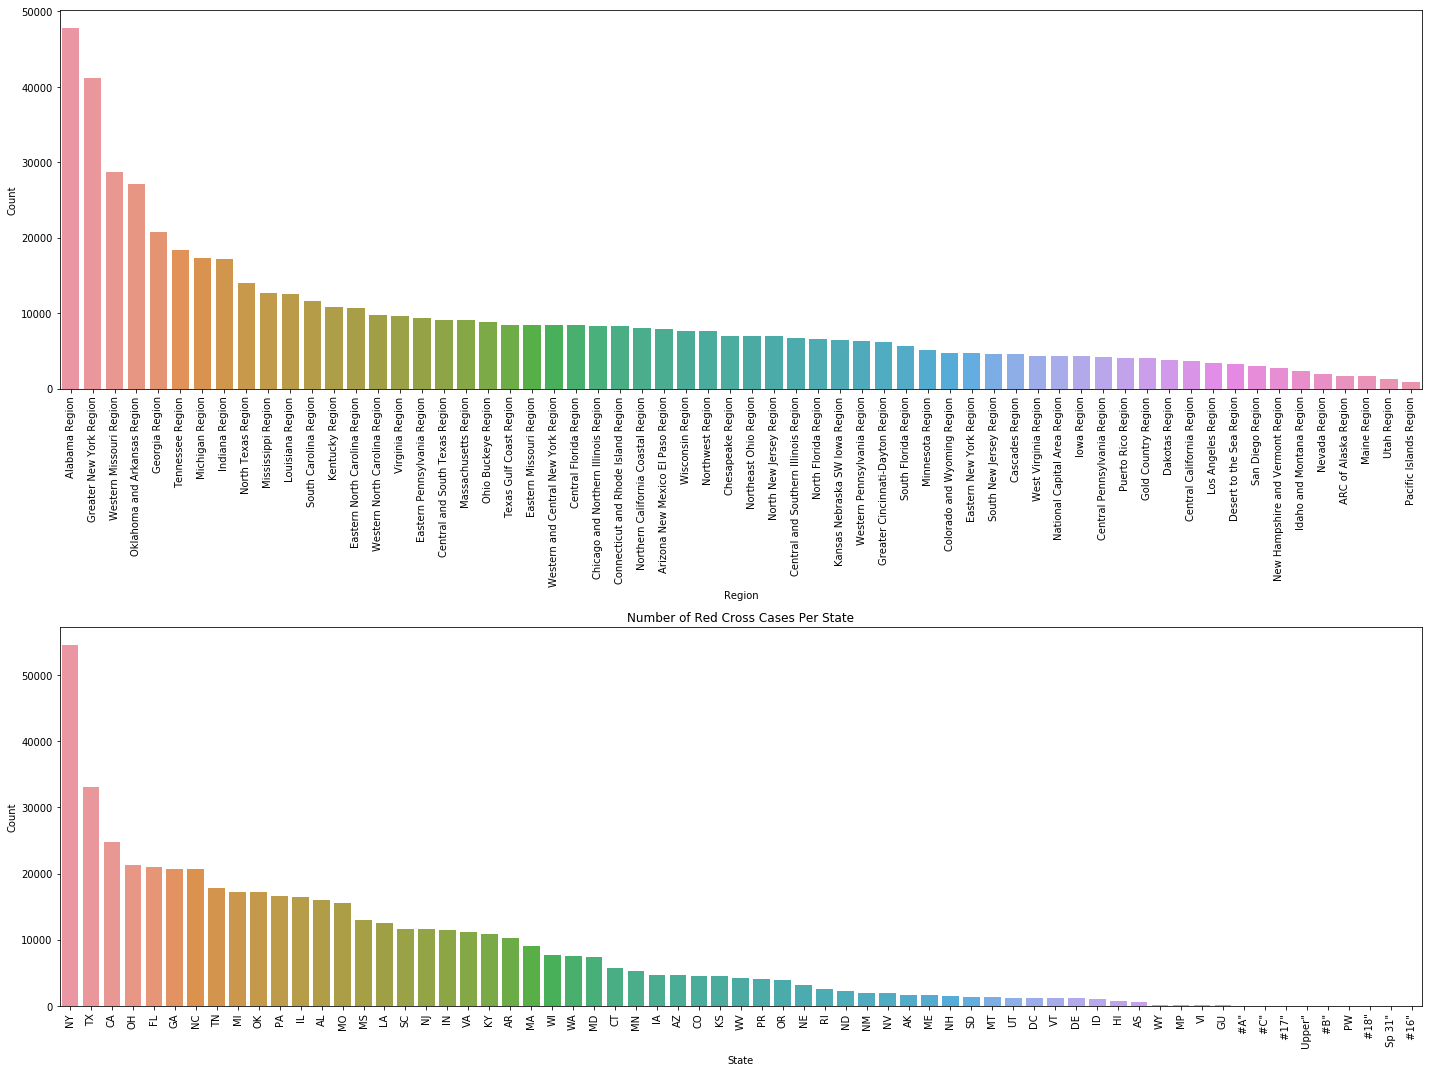

In [6]:
# Prepare dataframe, all cases, for region and state
rc_regions = raw['region_name'].value_counts(dropna = True).to_frame()
rc_regions = rc_regions.reset_index()
rc_regions.columns = ['Region','Count']

rc_state = raw['esri_state'].value_counts(dropna = True).to_frame()
rc_state = rc_state.reset_index()
rc_state.columns = ['State','Count']

# Plot total case counts against region & state
f, (ax1, ax2) = plt.subplots(2,1,figsize=(20, 15))
ax1 = sns.barplot(y = rc_regions['Count'], x = rc_regions['Region'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.title('Number of Red Cross Cases Per Region')

ax2 = sns.barplot(y = rc_state['Count'], x = rc_state['State'], ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.title('Number of Red Cross Cases Per State')
f.tight_layout()

plt.show()

The state column contains state abbreviations as well as some unknown codes that are present at very low frequencies (n <= 2).

In [7]:
print(set(raw[raw['esri_state'].notnull()]['esri_state']))
print(raw['esri_state'].value_counts().tail(15))

{'AZ', 'FL', 'MI', 'TN', 'HI', 'NH', 'ND', 'RI', ' #18"', 'SC', 'MS', 'ID', 'WV', 'MN', 'AS', 'NJ', 'GU', 'WI', 'NY', 'PW', 'PA', ' #B"', 'TX', 'LA', 'IN', ' Sp 31"', 'DE', 'MO', 'MD', 'NM', 'UT', 'AR', 'CT', 'MT', 'VI', ' #C"', 'OR', 'NE', 'MP', 'IL', ' #A"', ' #16"', 'CO', 'PR', 'KY', 'OK', 'AL', 'NV', 'WA', ' #17"', 'OH', 'NC', 'DC', 'VT', 'WY', 'GA', 'CA', 'SD', 'VA', 'KS', 'AK', 'MA', ' Upper"', 'IA', 'ME'}
HI         710
AS         627
WY         184
MP          78
VI          73
GU          55
 #A"         2
 #C"         1
 #17"        1
 Upper"      1
 #B"         1
PW           1
 #18"        1
 Sp 31"      1
 #16"        1
Name: esri_state, dtype: int64


# Red Cross Fire Case Distribution Across Regions & States
Phase 1 code examined the following event categories:
- Fire : Single Family
- Fire : Multi-Family
- Fire

## Generate dataframes of fire case frequency by region & state

In [8]:
# Find the names & unique spellings of all fire cases that fit the list above
# Phase 1 code left out Fire : Private/Home
print(set(raw['event_type_old_categories']))

{nan, 'Hazardous Materials Incident', 'Fire : Multi-Family', 'Hazardous Material Incidents, Chem Spills', 'Fire : Private/Home', 'Fire : Single Family', 'Epidemic', 'Tornadoes, Cyclone', 'Volcano', 'WMD', 'Power Outage', 'Tropical Storm', 'Mudslide', 'Fire : Hotel/Motel', 'Tsunami / Wave', 'Civil Disturbance', 'Nuclear Incident', 'Fire', 'Blizzard/Snowstorm', 'Tornado', 'Fire : Industrial/Company', 'Earthquake', 'Flood', 'Ice Storms', 'Search and Rescue', 'Landslide', 'Hurricanes, Tropical Storms, Typhoons', 'Hazardous Material Incidents', 'Snow', 'Hurricane Flood', 'Dam Break', 'Other', 'Flood/Tornado', 'Partial Collapse', 'Drought', 'Explosion', 'Forest Fire(wild,range,grass)', 'Building Collapse', 'Blizzard', 'Hail', 'Hurricane', 'Unknown', 'Flood & Tornado', 'Other Storm', 'Flash Flood', 'Transportation Incident', 'Forest Fire (Includes Wild, Range and Grass Fire)', 'Refugee Operation', 'Other Storms', 'Vacate', 'Cyclone'}


In [9]:
# Subset original dataframe
fire_names = ['Fire','Fire : Multi-Family','Fire : Private/Home','Fire : Single Family']
fire_df = raw[(raw['event_type_old_categories'] == fire_names[0])
                | (raw['event_type_old_categories'] == fire_names[1])
                | (raw['event_type_old_categories'] == fire_names[2])
                | (raw['event_type_old_categories'] == fire_names[3])]
fire_df.head()

,case_num,incident_disaster_date,incident_disaster_num,dr_type,event_type_old_categories,event_type_new_categories,incident_disaster_fiscal_year,chapter_code,chapter_name,region_code,...,ethnicity_undeclared_num,esri_longitude_x,esri_latitude_x,esri_single_address_string,esri_address,esri_city,esri_state,esri_zip,Unnamed: 39,Unnamed: 40
0,1-60911618,1/1/09,1-109JOX,Incident,Fire : Single Family,Fire,2009,1192.0,American Red Cross serving North Alabama,01R04,...,5.0,-86.765284,34.810583,NaN,Wall Triana,Harvest,AL,35749,NaN,NaN
1,1-60954839,1/1/09,1-10AH1R,Incident,Fire : Single Family,Fire,2009,1176.0,American Red Cross serving East Alabama,01R04,...,0.0,-86.147937,31.764383,NaN,CO RD 1161,Goshen,AL,36035,NaN,NaN
2,1-60955997,1/1/09,1-10AHXZ,Incident,Fire : Single Family,Fire,2009,1216.0,American Red Cross serving Central Alabama,01R04,...,0.0,-85.622874,32.807411,"PEARSON RD, CAMP HILL, AL, 36850",Pearson Rd,Camp Hill,AL,36850,NaN,NaN
3,1-60957890,1/1/09,1-10AJEK,Incident,Fire : Single Family,Fire,2009,1192.0,American Red Cross serving North Alabama,01R04,...,5.0,-86.396463,34.617060,"OLD GURLEY PIKE, GURLEY, AL, 35748",Old Gurley Pk,Gurley,AL,35748,NaN,NaN
4,1-61056857,1/1/09,1-10CNRN,Incident,Fire : Single Family,Fire,2009,1019.0,American Red Cross serving Mid Alabama,01R04,...,4.0,-86.777434,33.738204,NaN,J.D. Coleman Road,Morris,AL,35116,NaN,NaN


There is only one entry with the category 'Fire : Private/Home' which is probably why it was left out.

In [10]:
# Find the frequency of fire categories
print(fire_df['event_type_old_categories'].value_counts())

# Check out the lone Private/Home entry
fire_df[fire_df['event_type_old_categories'] == 'Fire : Private/Home']

Fire : Single Family    245639
Fire : Multi-Family     139698
Fire                     78825
Fire : Private/Home          1
Name: event_type_old_categories, dtype: int64


,case_num,incident_disaster_date,incident_disaster_num,dr_type,event_type_old_categories,event_type_new_categories,incident_disaster_fiscal_year,chapter_code,chapter_name,region_code,...,ethnicity_undeclared_num,esri_longitude_x,esri_latitude_x,esri_single_address_string,esri_address,esri_city,esri_state,esri_zip,Unnamed: 39,Unnamed: 40
320237,1-46351,6/6/12,1-ZR7,Incident,Fire : Private/Home,Fire,2012,5503.0,American Red Cross of the Bay Area,05R28,...,3.0,-122.419083,37.712452,"BROOKDALE AVE, SAN FRANCISCO, CA, 94134",Brookdale Ave,San Francisco,CA,94134,NaN,NaN


In [21]:
# Group by region and category to get frequency
fire_region_df = fire_df.groupby(['region_name','event_type_old_categories']).size().reset_index(name = 'counts')
fire_region_df.head(20)

,region_name,event_type_old_categories,counts
0,ARC of Alaska Region,Fire : Multi-Family,583
1,ARC of Alaska Region,Fire : Single Family,692
2,Alabama Region,Fire,26144
3,Alabama Region,Fire : Multi-Family,2058
4,Alabama Region,Fire : Single Family,10675
5,Arizona New Mexico El Paso Region,Fire : Multi-Family,2027
6,Arizona New Mexico El Paso Region,Fire : Single Family,4957
7,Cascades Region,Fire : Multi-Family,1556
8,Cascades Region,Fire : Single Family,2715
9,Central California Region,Fire,2


In [23]:
# Group by state and category to get frequency
fire_state_df = fire_df.groupby(['esri_state','event_type_old_categories']).size().reset_index(name = 'counts')
fire_state_df.head(20)

,esri_state,event_type_old_categories,counts
0,"#16""",Fire : Multi-Family,1
1,"#17""",Fire : Multi-Family,1
2,"#18""",Fire : Multi-Family,1
3,"#A""",Fire : Single Family,2
4,"#B""",Fire : Multi-Family,1
5,"#C""",Fire : Multi-Family,1
6,"Sp 31""",Fire : Single Family,1
7,"Upper""",Fire : Multi-Family,1
8,AK,Fire : Multi-Family,583
9,AK,Fire : Single Family,692


## Generate barplots of fire case frequency by region & state
Largest number of cases seem to be of the 'Fire : Single Family' category.

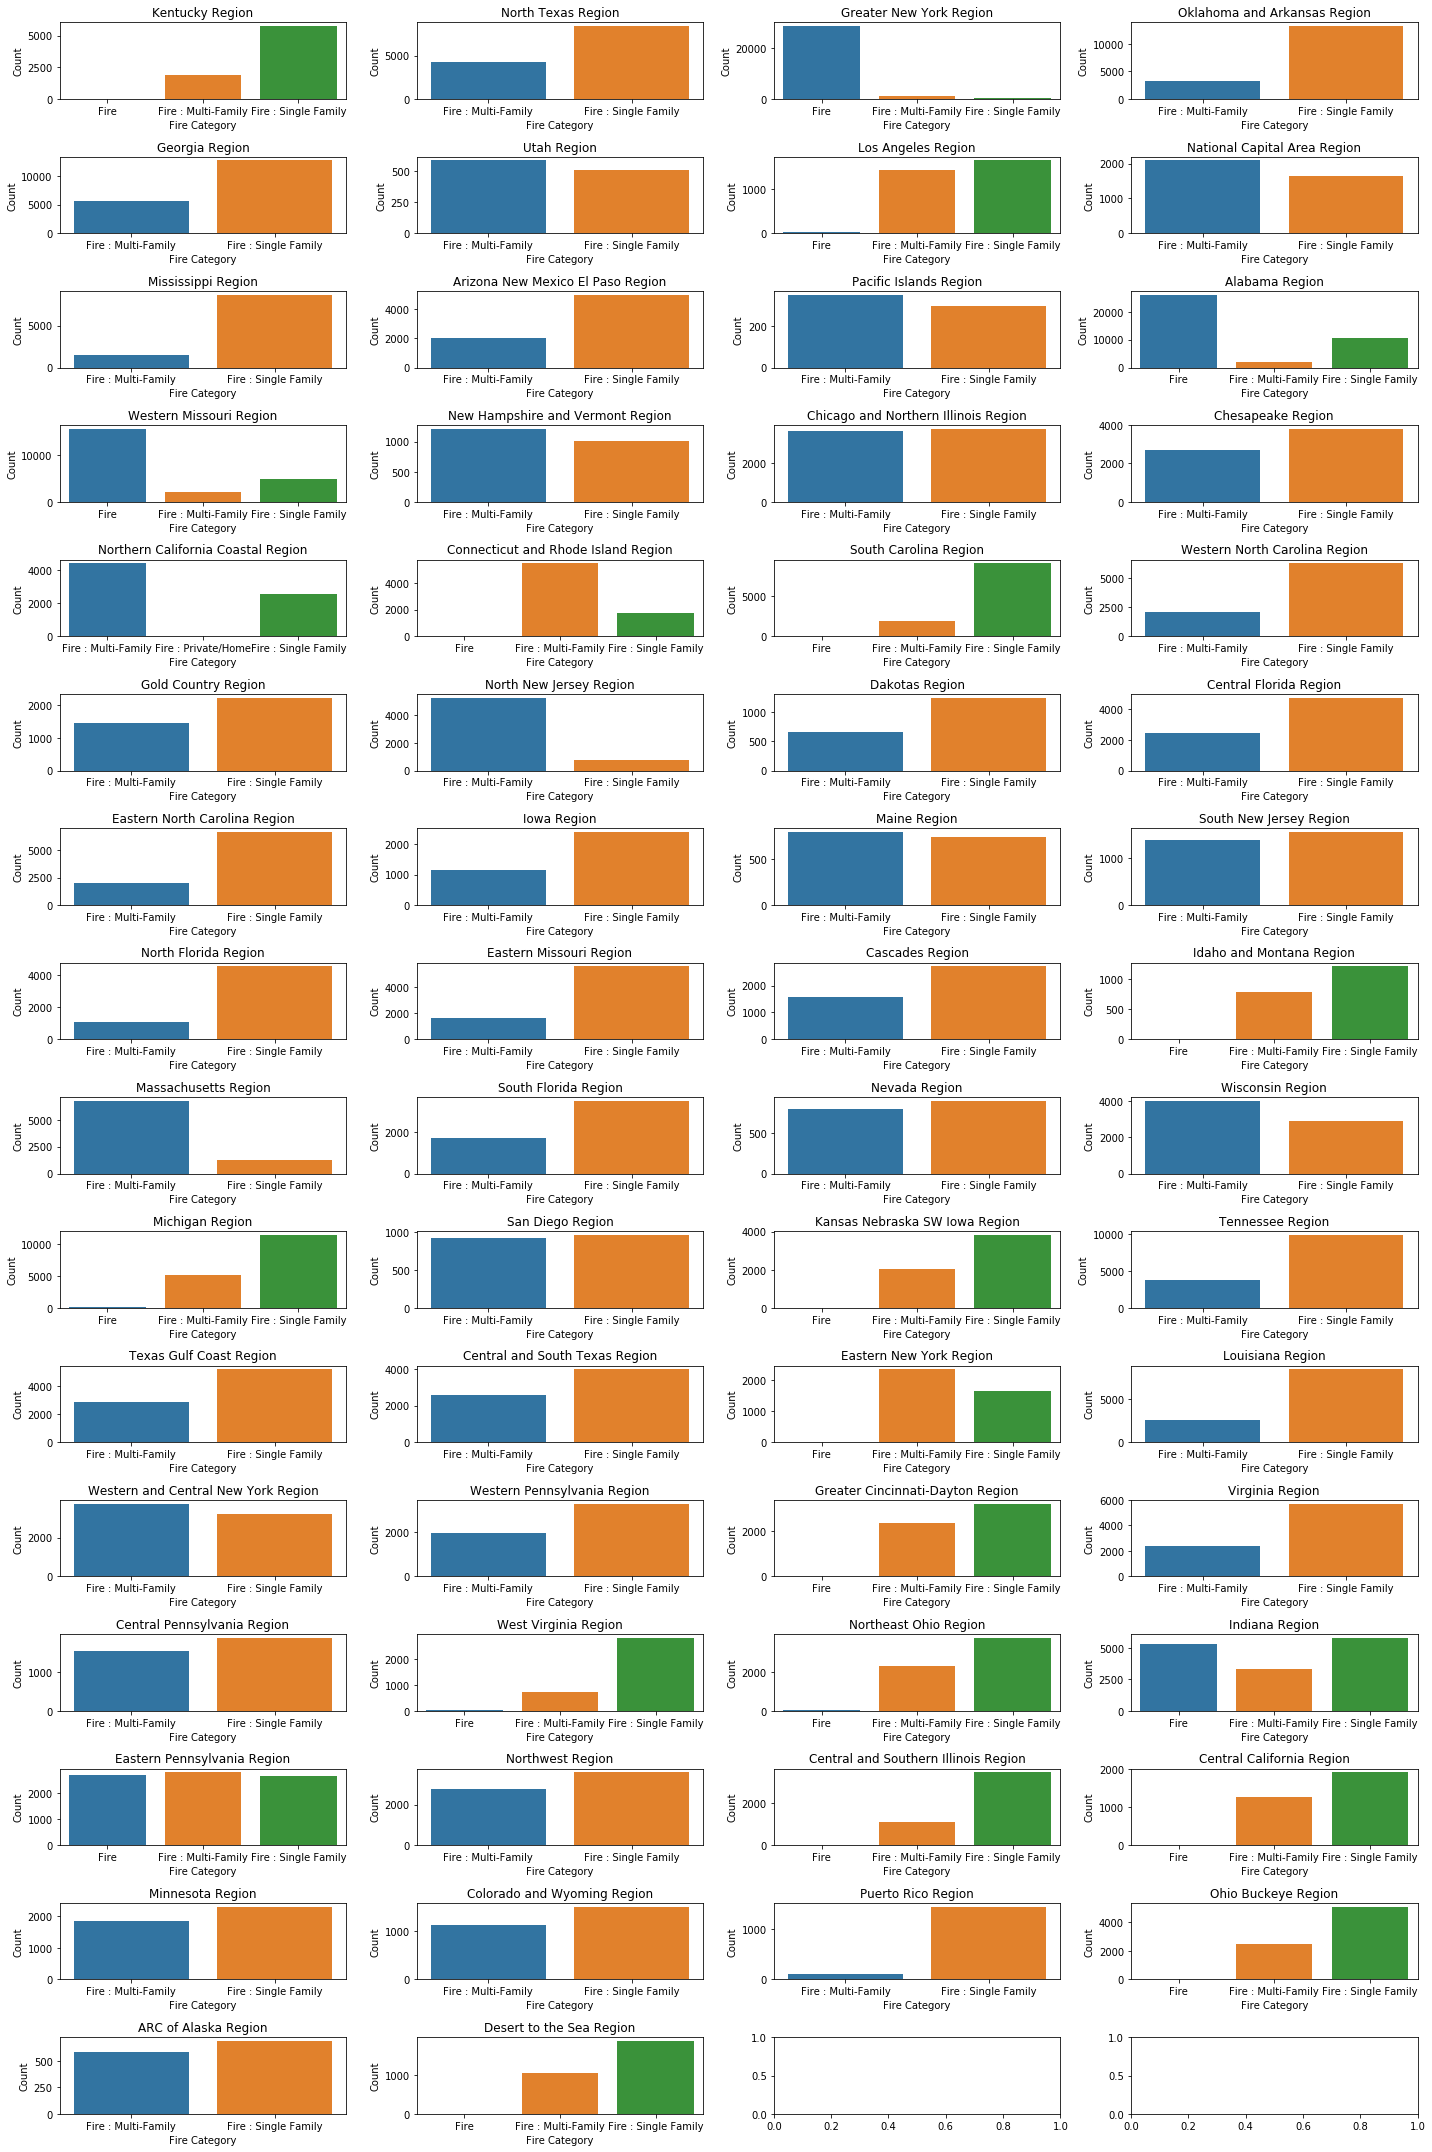

In [54]:
# Barplots of fire event categories for each region
region_names = list(set(fire_region_df['region_name']))
num_regions = len(region_names)

nrows = 16
ncols = 4
f, ax = plt.subplots(nrows, ncols, figsize = (20,30))
counter = 0
for row in range(nrows):
    for col in range(ncols):
        if counter < num_regions:
            temp_df = temp_df = fire_region_df[fire_region_df['region_name'] == region_names[counter]]
            p = sns.barplot(y = temp_df['counts'], x = temp_df['event_type_old_categories'], ax = ax[row,col])
            p.set_xlabel('Fire Category')
            p.set_ylabel('Count')
            p.set_title(region_names[counter])
            counter += 1
f.tight_layout()

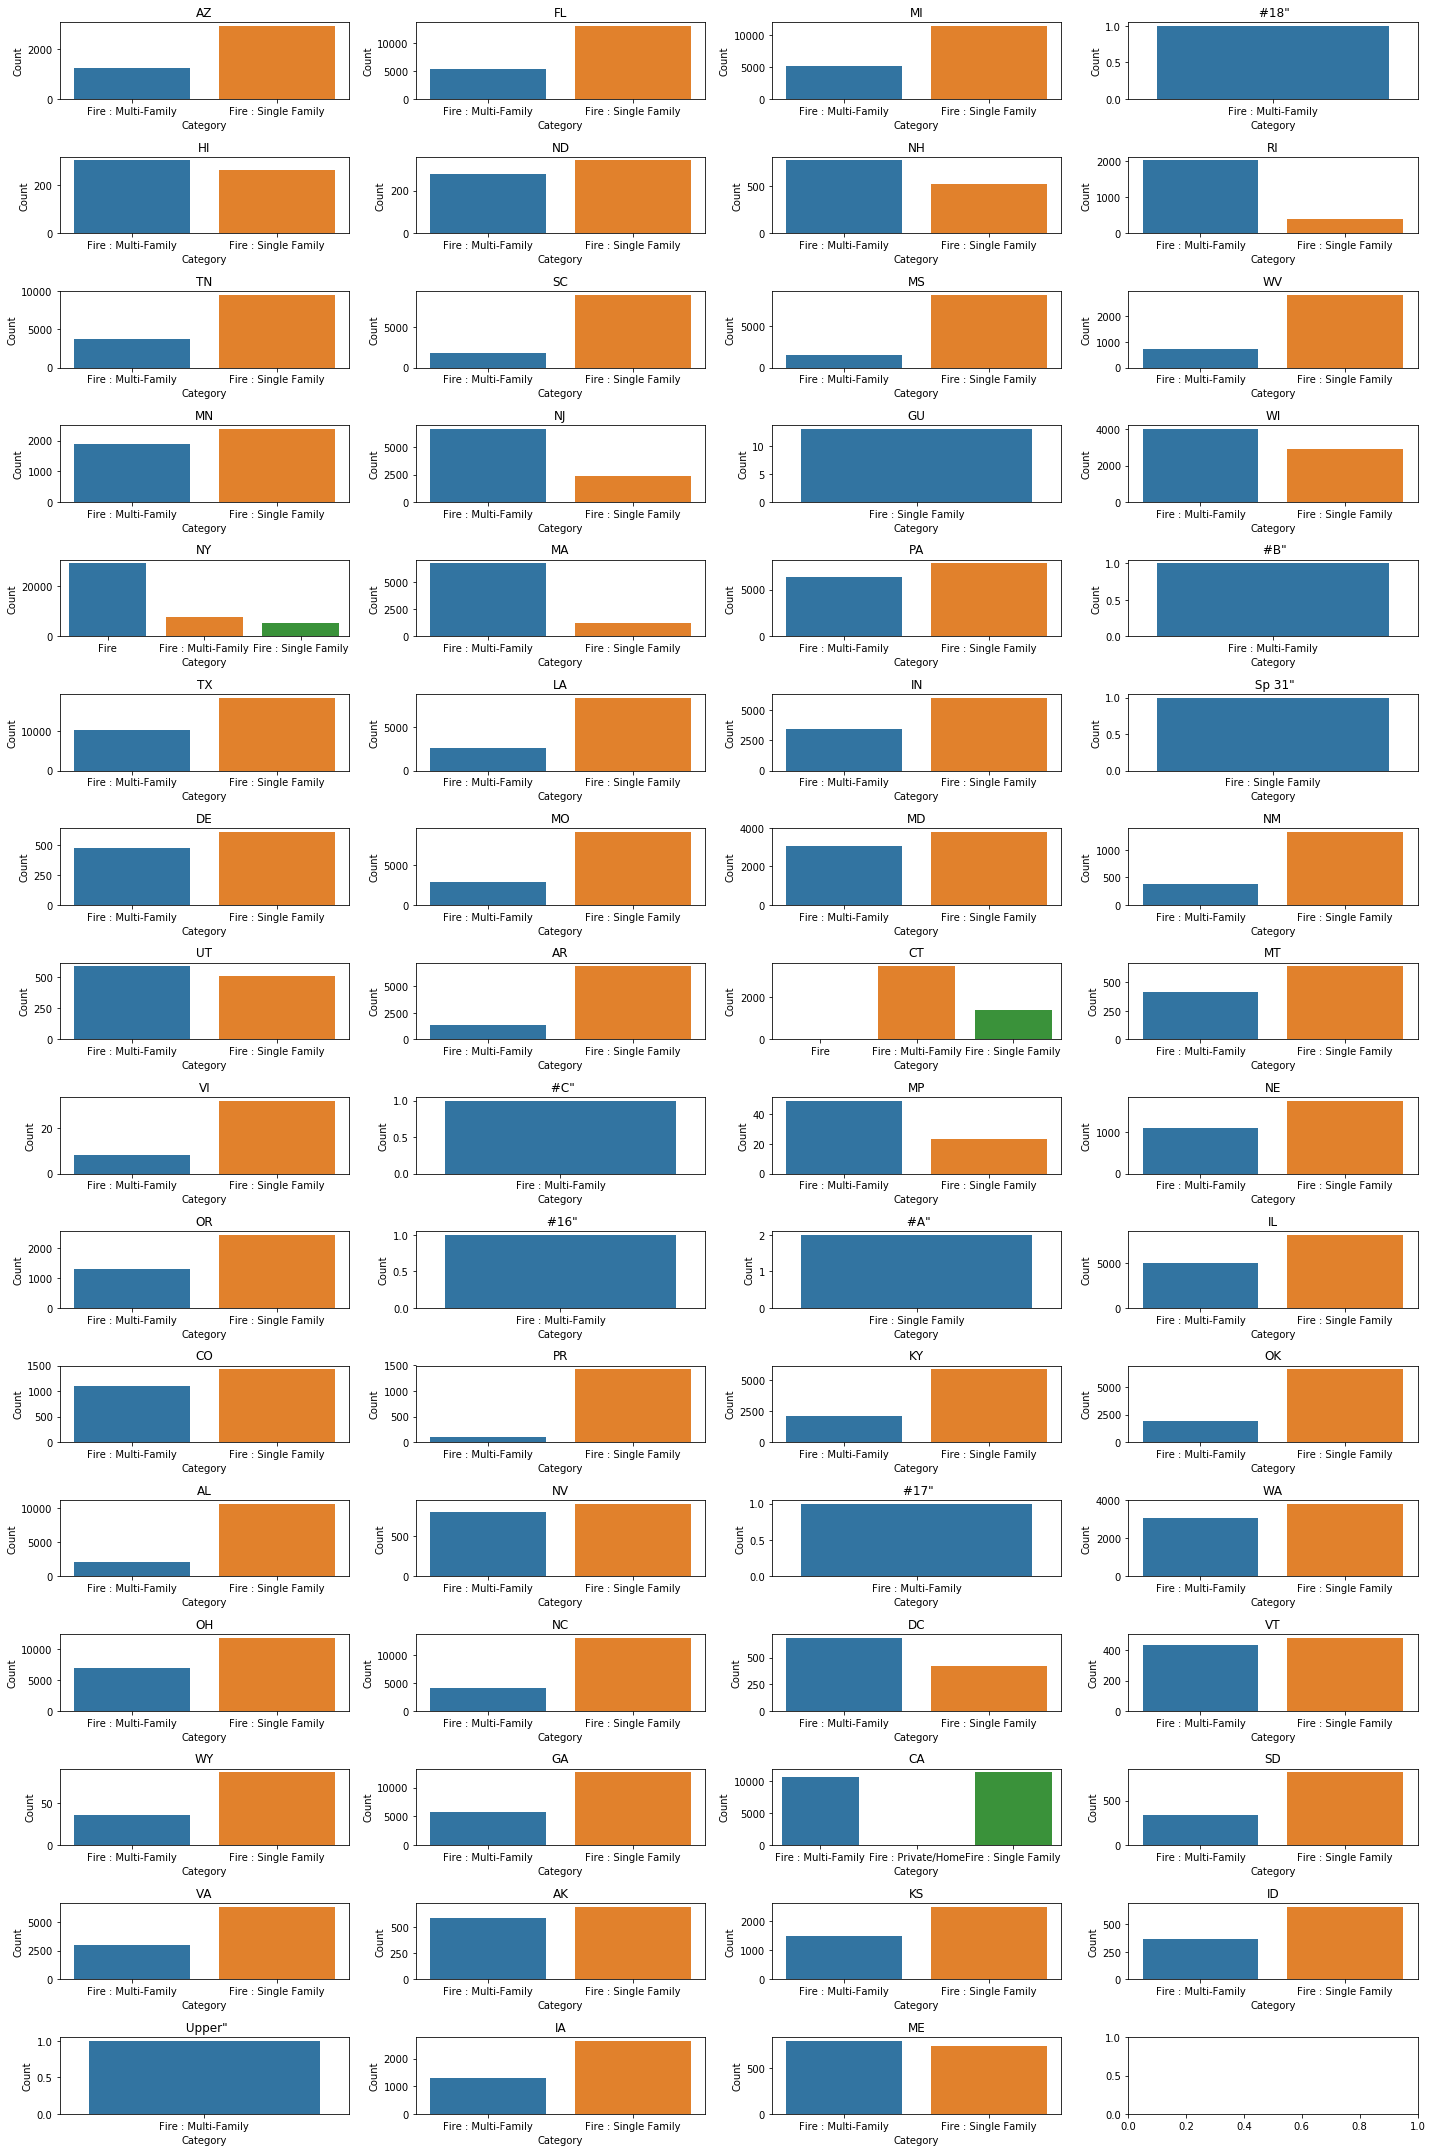

In [56]:
# Barplots of fire event categories for each state
state_names = list(set(fire_state_df['esri_state']))
num_states = len(state_names)

nrows = 16
ncols = 4
f, ax = plt.subplots(nrows, ncols, figsize = (20,30))
counter = 0
for row in range(nrows):
    for col in range(ncols):
        if counter < num_states:
            temp_df = temp_df = fire_state_df[fire_state_df['esri_state'] == state_names[counter]]
            p = sns.barplot(y = temp_df['counts'], x = temp_df['event_type_old_categories'], ax = ax[row,col])
            p.set_xlabel('Category')
            p.set_ylabel('Count')
            p.set_title(state_names[counter])
            counter += 1
f.tight_layout()

## Examine the relationship between fire categories and demographical information

In [75]:
temp_df = fire_df[['event_type_old_categories','esri_state','region_name','num_clients', 'num_cases_w_fin_assist',
       'age_5_or_under_num', 'age_62_to_69_num', 'age_6_to_61_num',
       'age_over_69_num', 'female_num', 'male_num', 'gender_undeclared_num',
       'afro_american_num', 'native_american_num', 'asian_num',
       'caucasian_num', 'hispanic_num', 'ethnicity_undeclared_num']]
temp_df.groupby(['event_type_old_categories']).agg(['sum','min','max','mean'])

num_cases_w_fin_assist                      \
                                             sum  min  max      mean   
event_type_old_categories                                              
Fire                                     56231.0  0.0  1.0  0.713365   
Fire : Multi-Family                     126379.0  0.0  6.0  0.906125   
Fire : Private/Home                          0.0  0.0  0.0  0.000000   
Fire : Single Family                    223685.0  0.0  4.0  0.910985   

                          age_5_or_under_num                       \
                                         sum  min   max      mean   
event_type_old_categories                                           
Fire                                     0.0  NaN   NaN       NaN   
Fire : Multi-Family                  49572.0  0.0   7.0  0.360364   
Fire : Private/Home                      0.0  0.0   0.0  0.000000   
Fire : Single Family                112265.0  0.0  12.0  0.465430   

                          age_62_to_69_num         ...    caucasian_num  \
                                       sum  min    ...              max   
event_type_old_categories                          ...                    
Fire                                   0.0  NaN    ...              NaN   
Fire : Multi-Family                10411.0  0.0    ...             13.0   
Fire : Private/Home                    0.0  0.0    ...              0.0   
Fire : Single Family               27383.0  0.0    ...             19.0   

                                    hispanic_num                       \
                               mean          sum  min   max      mean   
event_type_old_categories                                               
Fire                            NaN          0.0  NaN   NaN       NaN   
Fire : Multi-Family        0.340736      31586.0  0.0  18.0  0.229614   
Fire : Private/Home        0.000000          0.0  0.0   0.0  0.000000   
Fire : Single Family       0.820312      48223.0  0.0  19.0  0.199924   

                          ethnicity_undeclared_num                       
                                               sum  min   max      mean  
event_type_old_categories                                                
Fire                                           0.0  NaN   NaN       NaN  
Fire : Multi-Family                       204962.0  0.0  22.0  1.489972  
Fire : Private/Home                            3.0  3.0   3.0  3.000000  
Fire : Single Family                      415602.0  0.0  25.0  1.723010  

[4 rows x 56 columns]